In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Median value of owner-occupied homes: 21.2


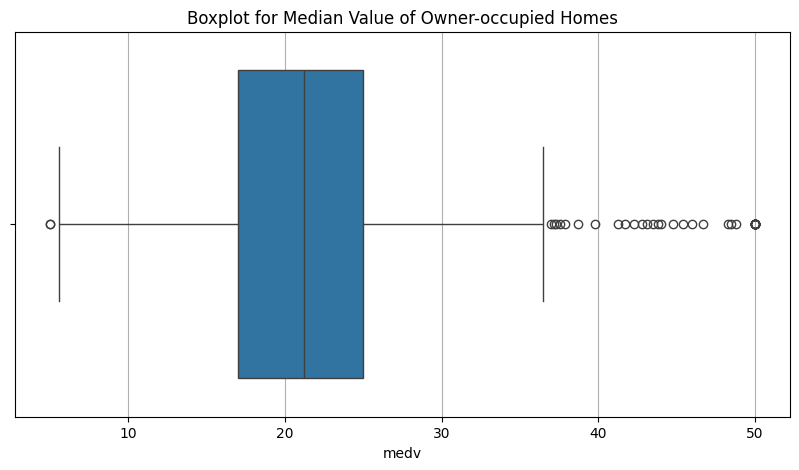

In [17]:
# boxplot for median value of owner-occupied homes
median_value = df['medv'].median()
print(f"Median value of owner-occupied homes: {median_value}")

plt.figure(figsize=(10,5))
plt.grid(True)
sns.boxplot(x=df['medv'])
plt.title('Boxplot for Median Value of Owner-occupied Homes')
plt.show()

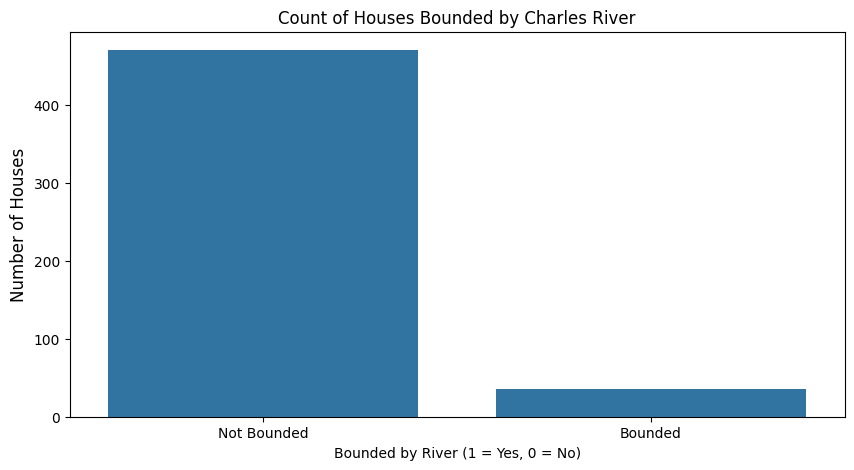

In [7]:
# bar plot for the Charles river variable
plt.figure(figsize=(10,5))
sns.countplot(x='chas', data=df)
plt.title('Count of Houses Bounded by Charles River')
plt.xlabel('Bounded by River (1 = Yes, 0 = No)')
plt.ylabel('Number of Houses', fontsize=12)
plt.xticks([0, 1], ['Not Bounded', 'Bounded'])
plt.show()

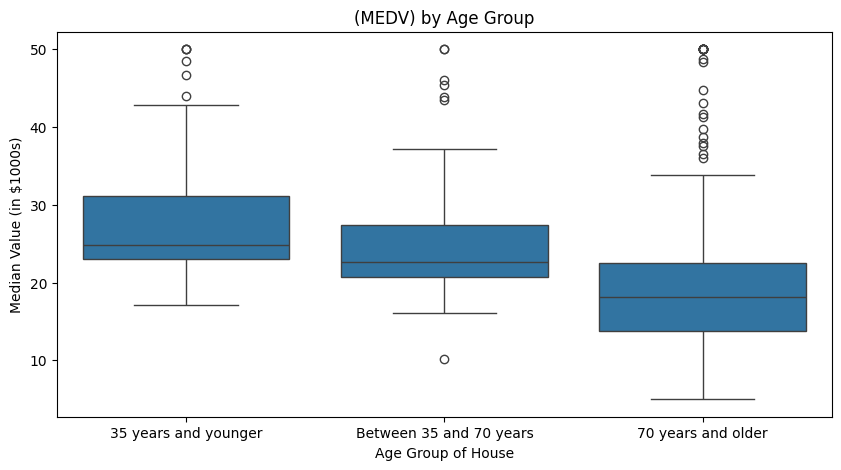

In [16]:
# boxplot for the MEDV variable vs the AGE variable
# Discretize the age variable into three groups
df['AGE_group'] = pd.cut(df['age'], bins=[0, 35, 70, 101],labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'],right=False)
plt.figure(figsize=(10,5))
sns.boxplot(x='AGE_group', y='medv', data=df)
plt.title('(MEDV) by Age Group')
plt.xlabel('Age Group of House')
plt.ylabel('Median Value (in $1000s)')
plt.show()

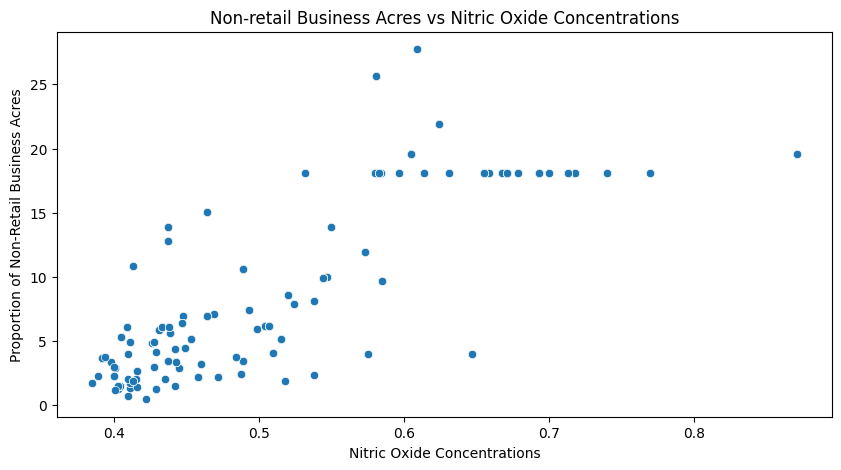

In [19]:
# scatter plot for Nitric oxide conc. and the proportion of non-retail business acres per town
plt.figure(figsize=(10, 5))
sns.scatterplot(x='nox', y='indus', data=df)
plt.title('Non-retail Business Acres vs Nitric Oxide Concentrations')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

# What can you say about the relationship?
# As the number of non-retail businesses in a town increases, so do nitric oxide levels.
# As industrial zones expand, nitric oxide concentrations tend to go up.
# It appears the connection is non-linear: nitric oxide concentrations rise more steeply when the proportion of industrial land is low.

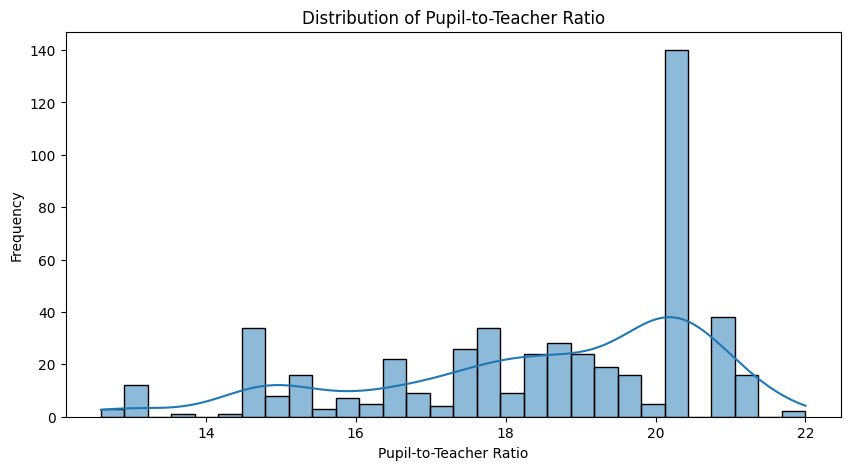

In [10]:
# histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 5))
sns.histplot(df['ptratio'], bins=30, kde=True)
plt.title('Distribution of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Null hypothesis: The mean median house value is the same for homes along the Charles River and homes not along the Charles River.
# Alternative hypothesis: The average house values differ significantly between the two groups.
# alpha = 0.05

import scipy.stats as stats

river_houses = df[df['chas'] == 1]['medv']
no_river_houses = df[df['chas'] == 0]['medv']

t_stat, p_value = stats.ttest_ind(river_houses, no_river_houses)

print("T-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

print("Decision:")
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median value of houses bounded by and not bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by and not bounded by the Charles river.")
     

T-test Results:
T-statistic: 3.9964
P-value: 0.0001
Decision:
Reject the null hypothesis. There is a significant difference in median value of houses bounded by and not bounded by the Charles river.


In [20]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Null hypothesis: There is no significant difference between medv and age.
# Alternative hypothesis: There is a significant difference between medv and age.
# alpha = 0.05

ageltf = df[df['age'] < 40]['medv']
agefts = df[(df['age'] >= 40) & (df['age'] < 70)]['medv']
agegts = df[df['age'] >= 70]['medv']

f_stat, p_value = stats.f_oneway(ageltf, agefts, agegts)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value}")

print("Decision:")
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median value of houses for each proportion of owner occupied units built prior to 1940.")
     

ANOVA Results:
F-statistic: 36.1934
P-value: 2.0626574112349743e-15
Decision:
Reject the null hypothesis. There is a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940.


In [13]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Null hypothesis: There is no significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.
# Alternative hypothesis: There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.
# alpha = 0.05

from scipy.stats import pearsonr

corr_coeff, p_value = stats.pearsonr(df['nox'], df['indus'])

print("Pearson Correlation Results:")
print(f"Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-value: {p_value}")

print("Decision:")
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")
     

Pearson Correlation Results:
Correlation Coefficient: 0.7637
P-value: 7.913361061239734e-98
Decision:
Reject the null hypothesis. There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.


In [15]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = df[['dis']]
y = df['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

m2e = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Results:")
print(f"Regression Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")
print(f"Mean Squared Error: {m2e:.4f}")
print(f"R-squared: {r2:.4f}")

     

Results:
Regression Coefficient: [1.0295094]
Intercept: 18.875962058273238
Mean Squared Error: 67.9569
R-squared: 0.0733
